# Clustering and Linear&Logistic Modeling

My dataset is about 54000 diamonds,(https://www.kaggle.com/shivam2503/diamonds) This is the specification by shivamagrawal:

"A data frame with 53940 rows and 10 variables:

price: price in US dollars ($326--$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)"

## Data Clean

Load data and do the same data clean as I did in assignment1.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = (15, 9)

dia = pd.read_csv('diamonds.csv')
dia.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
dia = dia[dia.x != 0] ##delete the row that x = 0
dia = dia[dia.y != 0] ##delete the row that y = 0
dia = dia[dia.z != 0] ##delete the row that z = 0
dia.describe()

,ID,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [3]:
df = pd.DataFrame(dia)

def set_colors(label):
 ##Fair, Good, Very Good, Premium, Ideal  
    if label =='Fair': 
        return 0
    elif label =='Good':
        return 1
    elif label =='Very Good':
        return 2
    elif label =='Premium':
        return 3
    elif label =='Ideal':
        return 4

def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[set_colors(label)])
    return colored_labels

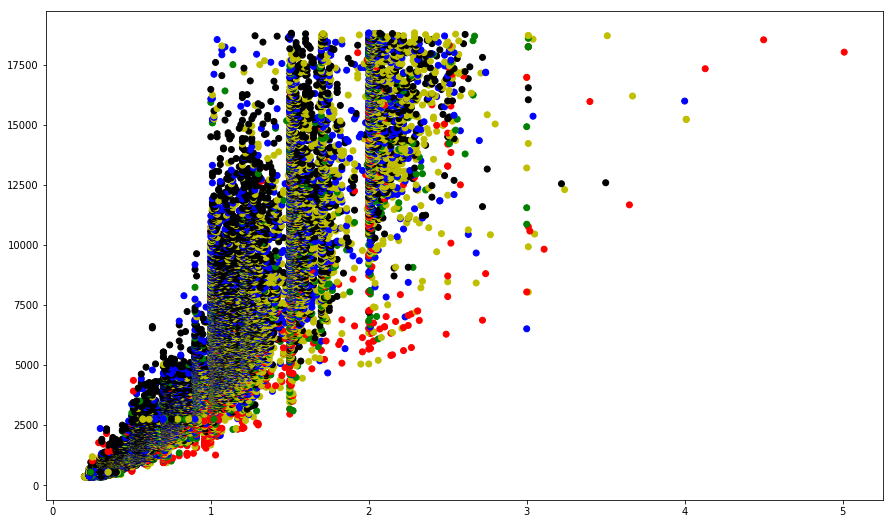

In [4]:
col = num_to_colors(df['cut'])
plt.scatter(df['carat'], df['price'],c=col)
plt.show()

This is the original distrubution of carat and price for different cut (Fair, Good, Very Good, Premium, Ideal)

## Clustering 

### k-means:

In [4]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
            colored_labels.append(colors[7]) 
        else:
            colored_labels.append(colors[label])
    return colored_labels

df1=df[["price","carat"]].values

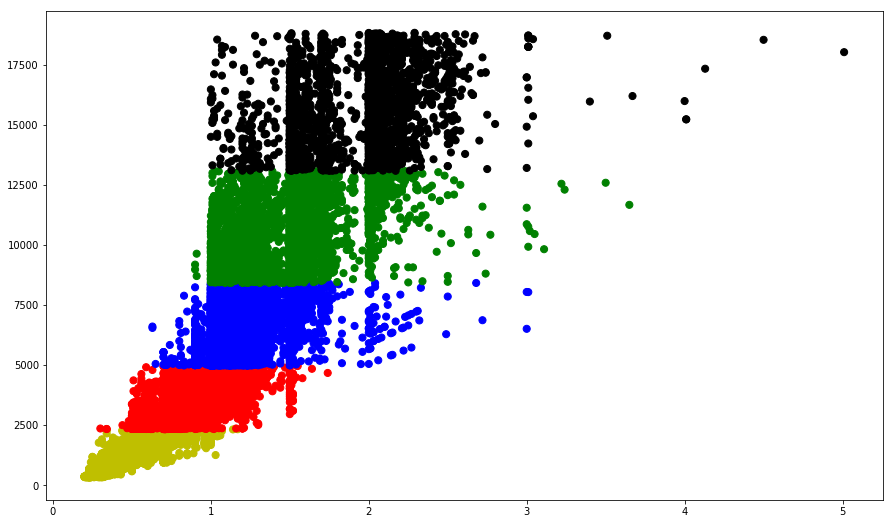

In [14]:
# Fit a k-means estimator

estimator = KMeans(n_clusters=5)
estimator.fit(df1)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df1[:, 1], df1[:, 0], c=colors,s=50)
plt.show()

Let's do normalization and see how does it change.

In [16]:
max_price = max(df["price"])
min_price = min(df["price"])
max_carat = max(df["carat"])
min_carat = min(df["carat"])

def normalization (data):
    scaling = (max_carat-min_carat)/(max_price-min_price)
    sc = (data-min_price)*scaling+min_carat
    return sc

df2=[]
for data in df1:
    df2.append([normalization(data[0]),data[1]])

from numpy import array
df2 = array(df2)

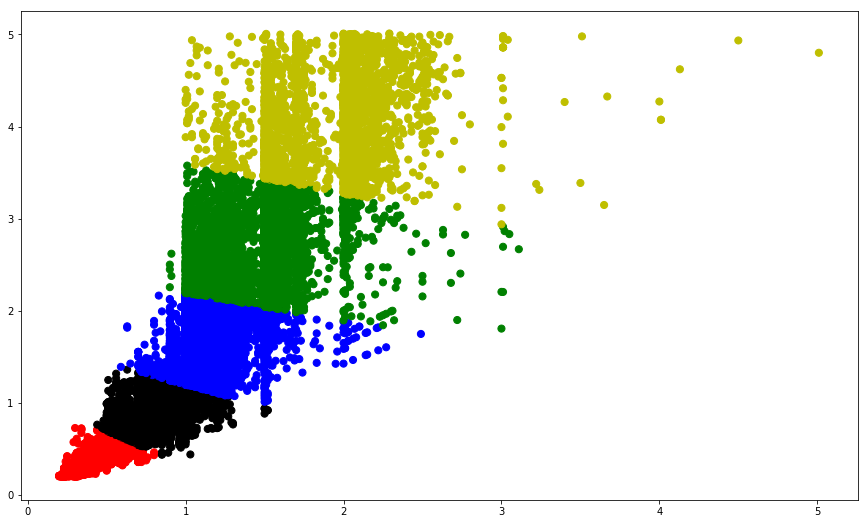

In [29]:
estimator = KMeans(n_clusters=5)
estimator.fit(df2)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df2[:, 1], df2[:, 0], c=colors,s=50)
plt.show() 

You can see the edges have a slop.

### DBSCAN:

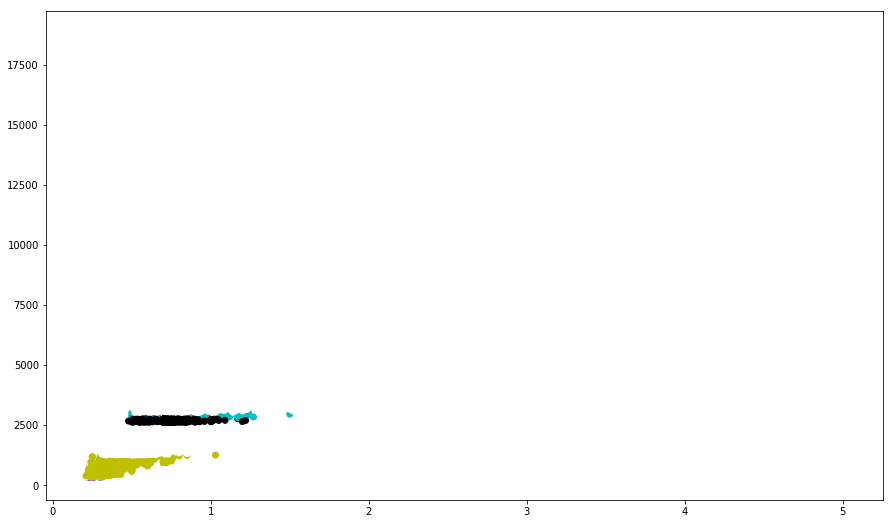

In [18]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=5)
estimator.fit(df1)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df1[:, 1], df1[:, 0], c=colors)
plt.show()

eps means: "The maximum distance between two samples for them to be considered as in the same neighborhood." eps = 2 does not make too much sence for my data.

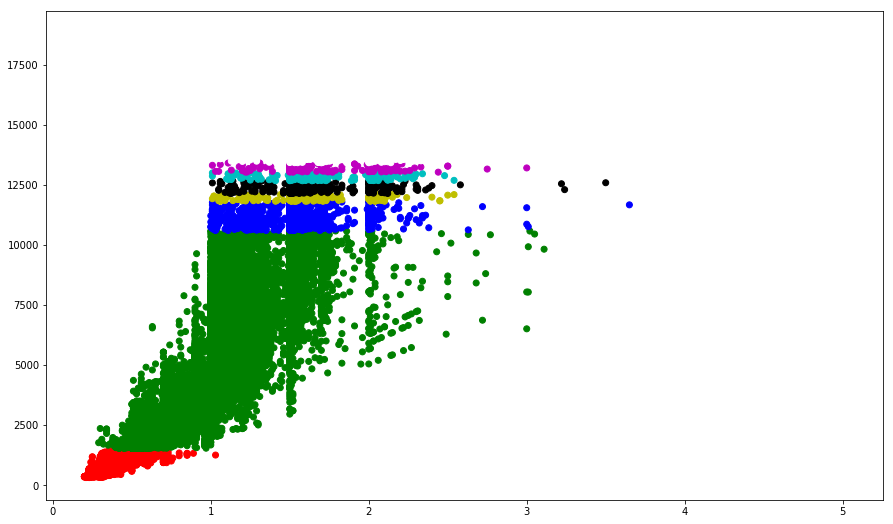

In [17]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=10, min_samples=5)
estimator.fit(df1)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df1[:, 1], df1[:, 0], c=colors)
plt.show()

So, I change eps from 2 to 10

Let's try the normalized data.

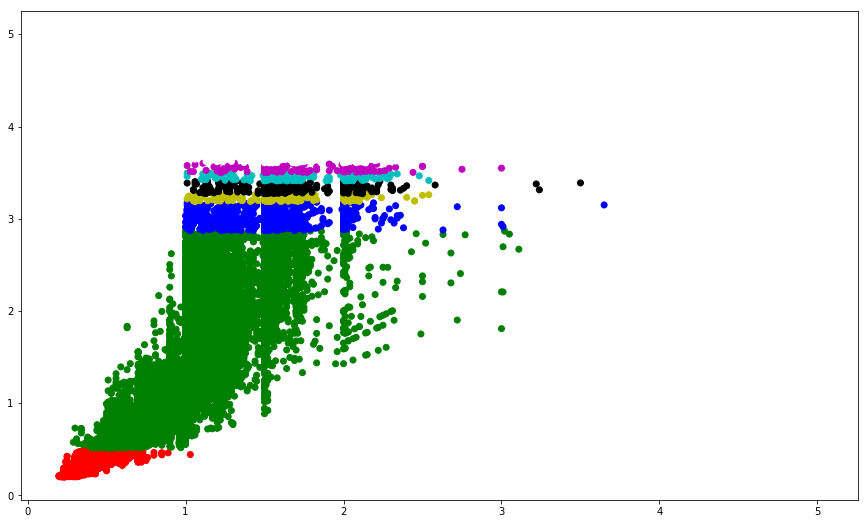

In [30]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=10, min_samples=5)
estimator.fit(df1)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df2[:, 1], df2[:, 0], c=colors)
plt.show()

Not too much change.

### Summary

1.I used K-means and DBSCAN generate two different cluster modles. K-means is more even clustering. However, for the DBSCAN, the cluster in the middle is much bigger than others, and there are more clusters at the end than the front. That is because the distance between each data point is smaller in the middle. From the previous EDA we know the data is in Skewed distribution. DBSCAN clustering prove that again. 

2.The scalingeffect K-mean. There is a slop for the edges between clusters. It does not effect the DBSCAN, but We get very different clustering result by change the eps.

3.It is very weird that there some vertical lines in the plot. I tried to find a model that can clustering by those line. But I failed.

## Linear Modeling

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

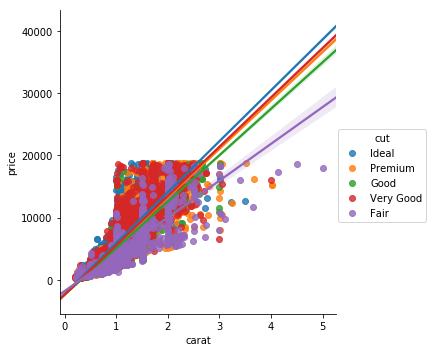

In [32]:
sns.lmplot(x="carat", y="price", hue="cut", data=dia)
plt.show()

In [37]:
x = dia[["carat"]]
y = dia[["price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-2255.76878704] [[ 7755.76725406]]


So we get a function like this:
    
    price = -2255.76878704 + 7755.76725406*carat

In [38]:
model = sm.OLS(y, x)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 4.002e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:54:32   Log-Likelihood:            -4.8441e+05
No. Observations:               53920   AIC:                         9.688e+05
Df Residuals:                   53919   BIC:                         9.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       5665.3605      8.955    632.621      0.000    5647.808    5682.913
==============================================================================
Omnibus:                    26111.751   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146568.334
Skew:                           2.341   Prob(JB):                         0.00
Kurtosis:                       9.582   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This linear modle is not very good. So let's take look at other linear relation.

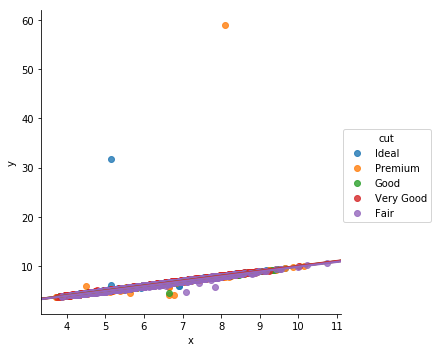

In [39]:
sns.lmplot(x="x", y="y", hue="cut", data=dia)
plt.show()

In [40]:
x = dia[["x"]]
y = dia[["y"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 0.04367546] [[ 0.99294873]]


In [41]:
model = sm.OLS(y, x)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.854e+07
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:11:27   Log-Likelihood:                -2591.8
No. Observations:               53920   AIC:                             5186.
Df Residuals:                   53919   BIC:                             5194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0003      0.000   5342.749      0.000       1.000       1.001
==============================================================================
Omnibus:                   251645.268   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2299705662528.886
Skew:                         169.995   Prob(JB):                         0.00
Kurtosis:                   31995.066   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 0.998. This one looks pretty good.

### Multi-colinearity

In [42]:
dia.corr()

,ID,carat,depth,table,price,x,y,z
ID,1.000000,-0.378173,-0.035058,-0.100872,-0.307092,-0.406331,-0.396480,-0.401758
carat,-0.378173,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,-0.035058,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,-0.100872,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,-0.307092,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,-0.406331,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,-0.396480,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,-0.401758,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


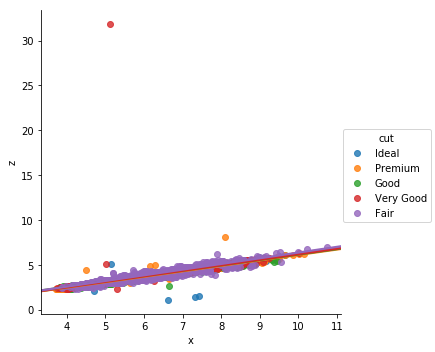

In [43]:
sns.lmplot(x="x", y="z", hue="cut", data=dia)
plt.show()

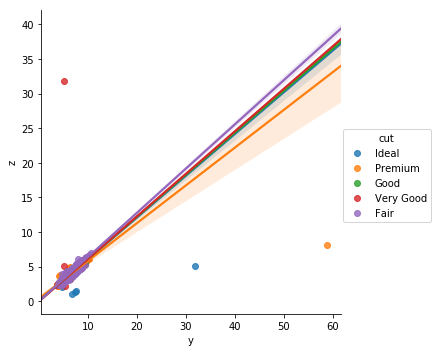

In [44]:
sns.lmplot(x="y", y="z", hue="cut", data=dia)
plt.show()

x,y,z,carat and price have high corelation. Because x, y, and z describe the shape of a diamond. It make sence that big x,y,z lead to big carat and high price. And they are not independent.

### Multiple Regression

Let's do a mutiple regression on carat and x,y,z

In [47]:
carat_xyz_model = ols("carat ~ x + y + z", data=dia).fit()
carat_xyz_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 4.014e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:32:25   Log-Likelihood:                 48691.
No. Observations:               53920   AIC:                        -9.737e+04
Df Residuals:                   53916   BIC:                        -9.734e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5774      0.002   -715.001      0.000      -1.582      -1.573
x              0.3528      0.002    156.469      0.000       0.348       0.357
y             -0.0011      0.002     -0.663      0.507      -0.004       0.002
z              0.1015      0.003     36.929      0.000       0.096       0.107
==============================================================================
Omnibus:                    28548.042   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2188754.527
Skew:                           1.700   Prob(JB):                         0.00
Kurtosis:                      34.027   Cond. No.                         70.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
carat_xyz_model.params

Intercept   -1.577436
x            0.352812
y           -0.001112
z            0.101502
dtype: float64

So, multiple regression model told me x is the most significant one. y and z are equal. 

In [63]:
from sklearn.model_selection import cross_val_score

### Cross-validate

Creating the Multiple Regression by Sklearn

In [85]:
x1 = np.array([dia["x"]])
x1 = x1.reshape(len(dia["x"]), 1)              
x2 = np.array([dia["y"]])
x2 = x2.reshape(len(dia["y"]), 1)   
x3 = np.array([dia["z"]])
x3 = x3.reshape(len(dia["z"]), 1)   
a = np.hstack([x1,x2,x3])

y = np.array(dia["carat"])
b = y.reshape(len(dia["carat"]), 1)


modle = linear_model.LinearRegression()
modle.fit(a, b)

print(modle.coef_)

[[ 0.3528123  -0.00111209  0.10150248]]


In [109]:
type(df)

pandas.core.frame.DataFrame

In [86]:
x=df[["x","y","z"]].values
y=df[["carat"]].values
score = cross_val_score(modle,x,y)
score

array([ 0.83663603,  0.91887323,  0.60584715])

Looks good

### Regularization

In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(a,b)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
score = cross_val_score(ridge,x,y)
score

array([ 0.83664842,  0.91886951,  0.60612292])

You can see that does not effect the score too much.

## Logistic Modeling

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)

In [108]:
dflo = df[["price","carat","x","y","z"]].values
df3=[]

def testDia(data):
    if data>=10000:
        return 1
    else:
        return 0

for data in dflo:
    df3.append([testDia(data[0]),data[1],data[2],data[3],data[4]])


df3 = array(df3)
df3

array([[ 0.  ,  0.23,  3.95,  3.98,  2.43],
       [ 0.  ,  0.21,  3.89,  3.84,  2.31],
       [ 0.  ,  0.23,  4.05,  4.07,  2.31],
       ..., 
       [ 0.  ,  0.7 ,  5.66,  5.68,  3.56],
       [ 0.  ,  0.86,  6.15,  6.12,  3.74],
       [ 0.  ,  0.75,  5.83,  5.87,  3.64]])

I add a column: 0 means it is a cheap diamond( less than 10000 ), 1 means it is a expensive diamond(>=10000)

In [125]:
x=[]
for data in df3:
    x.append([data[1],data[2],data[3],data[4]])
    
y = df3[...,0]    

In [126]:
LRm = lr.fit(x, y)

In [127]:
LRm.coef_

array([[-0.46916524,  1.18013713,  2.91679474,  0.35118748]])

In [128]:
LRm.intercept_

array([-31.10236127])

In [129]:
score = cross_val_score(LRm,x,y)
score

array([ 0.92984311,  0.89384076,  0.98920603])

The score is good. So there is a significant relationship between carat, x, y, z and expensive or not.